#**Using Moodle Test Scores to Predict Success in an Online Course**

##Preuzimanje potrebnih biblioteka

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import LabelBinarizer

##Dataset

In [ ]:
data = pd.read_excel('datasetP12122_gr2_kodirano.xlsx')
data.head()

,Rbr,studentID,Grupa,ponavljač,inicijalni,blic var,blic petlje,blic fun,kolokvij1,blic niz,blic dat,kolokvij2,kolokviji \nukupno,praktični položen,usmeni položen,konačna \nocjena
0,1,student1,INF,0,30.0,86.842105,60.0,16.666667,71,NaN,NaN,50.0,121,1,1,3
1,2,student2,INF,0,10.0,21.052632,40.0,58.333333,1,18.750000,50.000000,NaN,1,0,0,0
2,3,student3,IT,1,NaN,NaN,60.0,NaN,10,NaN,NaN,NaN,10,1,1,2
3,4,student4,INF,1,20.0,73.684211,30.0,75.000000,0,21.875000,31.818182,NaN,0,0,0,0
4,5,student5,IT,0,40.0,36.842105,50.0,75.000000,50,26.041667,54.545455,0.0,50,0,0,0


In [ ]:
data.columns = ['#No', 'StudentID', 'Group', 'Re-enrolled student', 'Initial test', 'Variables test', 'Loops test', 'Functions test', 'Colloquium1', 'Arrays test', 'Data files test', 'Colloquium2', 'Colloquium total', 'Practical exam passed', 'Oral exam passed', 'Final grade']

In [ ]:
data['Group'] = data['Group'].replace(['INF', 'IT', 'MI', 'MAT'],['CS','CST', 'MCS', 'MAT'])

In [ ]:
data.Group.unique()

array(['CS', 'CST', 'MCS', 'MAT', '?'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   #No                    166 non-null    int64  
 1   StudentID              166 non-null    object 
 2   Group                  166 non-null    object 
 3   Re-enrolled student    166 non-null    int64  
 4   Initial test           140 non-null    float64
 5   Variables test         144 non-null    float64
 6   Loops test             139 non-null    float64
 7   Functions test         108 non-null    float64
 8   Colloquium1            166 non-null    int64  
 9   Arrays test            100 non-null    float64
 10  Data files test        92 non-null     float64
 11  Colloquium2            70 non-null     float64
 12  Colloquium total       166 non-null    int64  
 13  Practical exam passed  166 non-null    int64  
 14  Oral exam passed       166 non-null    int64  
 15  Final 

In [ ]:
data.describe()

,#No,Re-enrolled student,Initial test,Variables test,Loops test,Functions test,Colloquium1,Arrays test,Data files test,Colloquium2,Colloquium total,Practical exam passed,Oral exam passed,Final grade
count,166.000000,166.000000,140.000000,144.000000,139.000000,108.000000,166.000000,100.000000,92.000000,70.000000,166.000000,166.000000,166.000000,166.000000
mean,83.500000,0.301205,44.028571,72.817982,54.388489,58.804012,30.439759,55.583333,53.606719,49.928571,50.680723,0.542169,0.445783,1.433735
std,48.064193,0.460170,17.658610,13.520700,21.336337,20.279483,26.294013,25.161916,23.025398,36.240869,56.252573,0.499726,0.498556,1.735147
min,1.000000,0.000000,10.000000,21.052632,20.000000,8.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.250000,0.000000,30.000000,65.789474,40.000000,41.666667,5.000000,34.114583,36.363636,10.000000,5.000000,0.000000,0.000000,0.000000
50%,83.500000,0.000000,40.000000,73.684211,50.000000,58.333333,24.500000,63.541667,59.090909,52.500000,21.000000,1.000000,0.000000,0.000000
75%,124.750000,1.000000,60.000000,84.052632,70.000000,75.000000,50.000000,75.000000,72.727273,78.750000,100.000000,1.000000,1.000000,3.000000
max,166.000000,1.000000,90.000000,100.000000,100.000000,100.000000,100.000000,95.833333,95.454545,100.000000,200.000000,1.000000,1.000000,5.000000


##Izbacivanje stupaca koje nećemo koristiti u predviđanju

In [ ]:
data = data.replace('?','MCS')
data.head(n=79)

,#No,StudentID,Group,Re-enrolled student,Initial test,Variables test,Loops test,Functions test,Colloquium1,Arrays test,Data files test,Colloquium2,Colloquium total,Practical exam passed,Oral exam passed,Final grade
0,1,student1,CS,0,30.0,86.842105,60.0,16.666667,71,NaN,NaN,50.0,121,1,1,3
1,2,student2,CS,0,10.0,21.052632,40.0,58.333333,1,18.750000,50.000000,NaN,1,0,0,0
2,3,student3,CST,1,NaN,NaN,60.0,NaN,10,NaN,NaN,NaN,10,1,1,2
3,4,student4,CS,1,20.0,73.684211,30.0,75.000000,0,21.875000,31.818182,NaN,0,0,0,0
4,5,student5,CST,0,40.0,36.842105,50.0,75.000000,50,26.041667,54.545455,0.0,50,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,student75,MCS,0,NaN,68.421053,NaN,NaN,50,31.250000,31.818182,30.0,80,1,1,3
75,76,student76,CS,1,70.0,65.789474,70.0,100.000000,50,64.583333,NaN,25.0,75,1,1,3
76,77,student77,CST,1,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,5,1,0,0
77,78,student78,CS,0,60.0,78.947368,80.0,NaN,50,70.833333,95.454545,65.0,115,1,1,3


In [ ]:
data_vizualizacija = data.copy()

In [ ]:
data = data.drop(['StudentID','Group','#No','Colloquium total'],axis=1)
data.head()

,Re-enrolled student,Initial test,Variables test,Loops test,Functions test,Colloquium1,Arrays test,Data files test,Colloquium2,Practical exam passed,Oral exam passed,Final grade
0,0,30.0,86.842105,60.0,16.666667,71,NaN,NaN,50.0,1,1,3
1,0,10.0,21.052632,40.0,58.333333,1,18.750000,50.000000,NaN,0,0,0
2,1,NaN,NaN,60.0,NaN,10,NaN,NaN,NaN,1,1,2
3,1,20.0,73.684211,30.0,75.000000,0,21.875000,31.818182,NaN,0,0,0
4,0,40.0,36.842105,50.0,75.000000,50,26.041667,54.545455,0.0,0,0,0


##Uklanjanje NaN vrijednosti

In [ ]:
data.isnull().sum()

Re-enrolled student       0
Initial test             26
Variables test           22
Loops test               27
Functions test           58
Colloquium1               0
Arrays test              66
Data files test          74
Colloquium2              96
Practical exam passed     0
Oral exam passed          0
Final grade               0
dtype: int64

In [ ]:
data_null = data.copy()
data_mean = data.copy()
data_median = data.copy()

In [ ]:
df1 = data[["Initial test","Variables test","Loops test", "Functions test", "Arrays test", "Data files test", "Colloquium2"]].mean()
df2 = data[["Initial test","Variables test","Loops test", "Functions test", "Arrays test", "Data files test", "Colloquium2"]].median()
print(df1)
print(df2)

Initial test       44.028571
Variables test     72.817982
Loops test         54.388489
Functions test     58.804012
Arrays test        55.583333
Data files test    53.606719
Colloquium2        49.928571
dtype: float64
Initial test       40.000000
Variables test     73.684211
Loops test         50.000000
Functions test     58.333333
Arrays test        63.541667
Data files test    59.090909
Colloquium2        52.500000
dtype: float64


In [ ]:
def replace_null(dataset,d):
  dataset["Initial test"].fillna(d["Initial test"], inplace = True)
  dataset["Variables test"].fillna(d["Variables test"], inplace = True)
  dataset["Loops test"].fillna(d["Loops test"], inplace = True)
  dataset["Functions test"].fillna(d["Functions test"], inplace = True)
  dataset["Arrays test"].fillna(d["Arrays test"], inplace = True)
  dataset["Data files test"].fillna(d["Data files test"], inplace = True)
  dataset["Colloquium2"].fillna(d["Colloquium2"].round(0).astype(int), inplace = True)

In [ ]:
data_null.fillna(0, inplace = True)
replace_null(data_mean,df1)
replace_null(data_median,df2)

In [ ]:
data_null.head()

,Re-enrolled student,Initial test,Variables test,Loops test,Functions test,Colloquium1,Arrays test,Data files test,Colloquium2,Practical exam passed,Oral exam passed,Final grade
0,0,30.0,86.842105,60.0,16.666667,71,0.000000,0.000000,50.0,1,1,3
1,0,10.0,21.052632,40.0,58.333333,1,18.750000,50.000000,0.0,0,0,0
2,1,0.0,0.000000,60.0,0.000000,10,0.000000,0.000000,0.0,1,1,2
3,1,20.0,73.684211,30.0,75.000000,0,21.875000,31.818182,0.0,0,0,0
4,0,40.0,36.842105,50.0,75.000000,50,26.041667,54.545455,0.0,0,0,0


In [ ]:
data_mean.head()

,Re-enrolled student,Initial test,Variables test,Loops test,Functions test,Colloquium1,Arrays test,Data files test,Colloquium2,Practical exam passed,Oral exam passed,Final grade
0,0,30.000000,86.842105,60.0,16.666667,71,55.583333,53.606719,50.0,1,1,3
1,0,10.000000,21.052632,40.0,58.333333,1,18.750000,50.000000,50.0,0,0,0
2,1,44.028571,72.817982,60.0,58.804012,10,55.583333,53.606719,50.0,1,1,2
3,1,20.000000,73.684211,30.0,75.000000,0,21.875000,31.818182,50.0,0,0,0
4,0,40.000000,36.842105,50.0,75.000000,50,26.041667,54.545455,0.0,0,0,0


In [ ]:
data_median.head()

,Re-enrolled student,Initial test,Variables test,Loops test,Functions test,Colloquium1,Arrays test,Data files test,Colloquium2,Practical exam passed,Oral exam passed,Final grade
0,0,30.0,86.842105,60.0,16.666667,71,63.541667,59.090909,50.0,1,1,3
1,0,10.0,21.052632,40.0,58.333333,1,18.750000,50.000000,52.0,0,0,0
2,1,40.0,73.684211,60.0,58.333333,10,63.541667,59.090909,52.0,1,1,2
3,1,20.0,73.684211,30.0,75.000000,0,21.875000,31.818182,52.0,0,0,0
4,0,40.0,36.842105,50.0,75.000000,50,26.041667,54.545455,0.0,0,0,0


##Vizualizacija

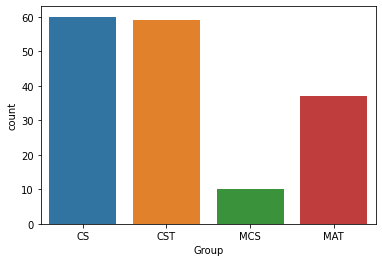

In [ ]:
ax = sns.countplot(x="Group", data=data_vizualizacija)

In [ ]:
data_vizualizacija['Re-enrolled student'].value_counts()

0    116
1     50
Name: Re-enrolled student, dtype: int64

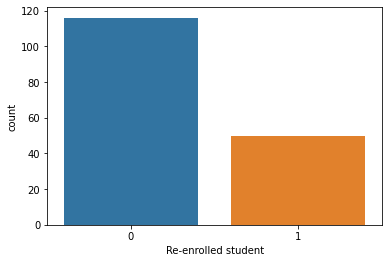

In [ ]:
ax = sns.countplot(x="Re-enrolled student", data=data_vizualizacija)

In [ ]:
data_vizualizacija.groupby(['Group','Re-enrolled student']).size().value_counts()

41    1
19    1
39    1
20    1
28    1
9     1
8     1
2     1
dtype: int64

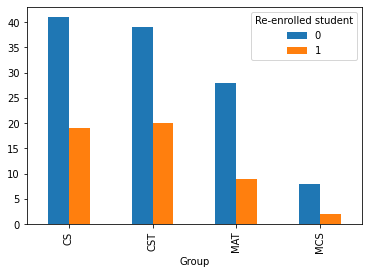

In [ ]:
df_gb = data_vizualizacija.groupby(['Group', 'Re-enrolled student']).size().unstack(level=1)
df_gb.plot(kind = 'bar')

In [ ]:
bin_inc = [-1, 49, 64, 74, 84, 100]
category_inc = ['<50', '50-65', '65-75', '75-85', '85>']
data_vizualizacija['Initial test'] = pd.cut(data_vizualizacija['Initial test'], bins=bin_inc, labels=category_inc)

In [ ]:
data_vizualizacija.head()

,#No,StudentID,Group,Re-enrolled student,Initial test,Variables test,Loops test,Functions test,Colloquium1,Arrays test,Data files test,Colloquium2,Colloquium total,Practical exam passed,Oral exam passed,Final grade
0,1,student1,CS,0,<50,86.842105,60.0,16.666667,71,NaN,NaN,50.0,121,1,1,3
1,2,student2,CS,0,<50,21.052632,40.0,58.333333,1,18.750000,50.000000,NaN,1,0,0,0
2,3,student3,CST,1,NaN,NaN,60.0,NaN,10,NaN,NaN,NaN,10,1,1,2
3,4,student4,CS,1,<50,73.684211,30.0,75.000000,0,21.875000,31.818182,NaN,0,0,0,0
4,5,student5,CST,0,<50,36.842105,50.0,75.000000,50,26.041667,54.545455,0.0,50,0,0,0


In [ ]:
data_vizualizacija.groupby(['Final grade', 'Initial test']).size().unstack(level=1).value_counts()

<50  50-65  65-75  75-85  85>
2    4      3      0      1      1
6    6      1      3      0      1
9    3      2      1      0      1
16   6      1      0      0      1
47   23     4      2      0      1
dtype: int64

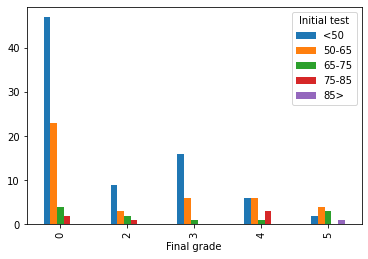

In [ ]:
df_gb = data_vizualizacija.groupby(['Final grade', 'Initial test']).size().unstack(level=1)
bars = df_gb.plot(kind = 'bar')

### Matrica korelacije


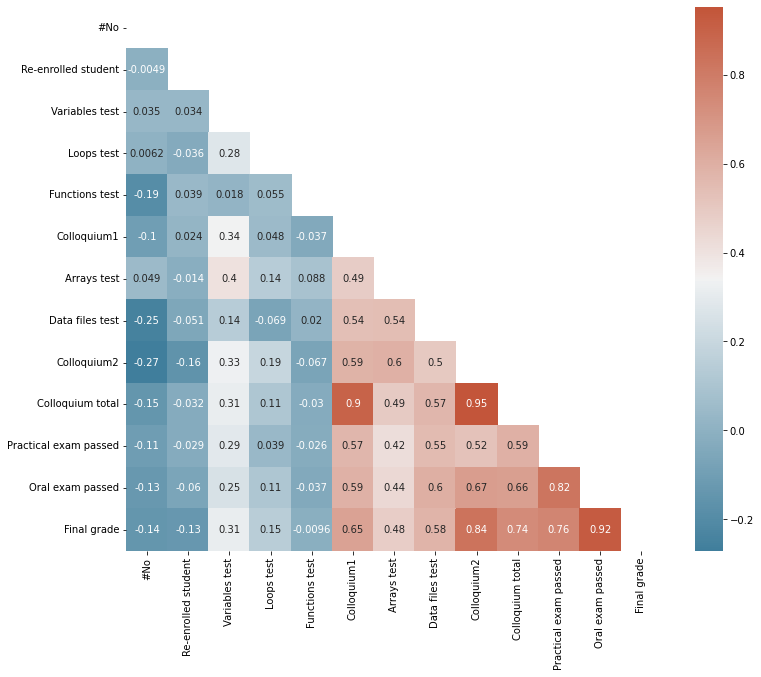

In [ ]:
corr = data_vizualizacija.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

##Predviđanja

###Metode predviđanja

In [ ]:
predict = []
y_array = []
cohen_1 = []
cohen_2 = []
auc_2 = []
auc_3 = []

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

In [ ]:
def metode(X_training,X_valid,y_training,y_valid,n):
  auc_1 = []
  lsvc_clf = LinearSVC()
  lsvc_clf.fit (X_training,y_training)
  pred_lsvc = lsvc_clf.predict(X_valid)
  acc_lsvc = accuracy_score(y_valid,pred_lsvc)

  gnb_clf = GaussianNB()
  gnb_clf.fit(X_training,y_training)
  pred_gnb = gnb_clf.predict(X_valid)
  acc_gnb = accuracy_score(y_valid,pred_gnb)

  dt_clf = DecisionTreeClassifier()
  dt_clf.fit(X_training,y_training)
  pred_dt = dt_clf.predict(X_valid)
  acc_dt = accuracy_score(y_valid,pred_dt)

  rf_clf = RandomForestClassifier()
  rf_clf.fit(X_training,y_training)
  pred_rf = rf_clf.predict(X_valid)
  acc_rf = accuracy_score(y_valid,pred_rf)

  svc_clf = SVC()
  svc_clf.fit (X_training,y_training)
  pred_svc = svc_clf.predict(X_valid)
  acc_svc = accuracy_score(y_valid,pred_svc)

  lg_clf = LogisticRegression()
  lg_clf.fit(X_training,y_training)
  pred_lg = lg_clf.predict(X_valid)
  acc_lg = accuracy_score(y_valid,pred_lg)

  kn_clf = KNeighborsClassifier()
  kn_clf.fit(X_training,y_training)
  pred_kn = kn_clf.predict(X_valid)
  acc_kn = accuracy_score(y_valid,pred_kn)

  nn_clf = MLPClassifier()
  nn_clf.fit(X_training,y_training)
  pred_nn = nn_clf.predict(X_valid)
  acc_nn = accuracy_score(y_valid,pred_lg)

  if n == 1:
    auc_1.append(multiclass_roc_auc_score(y_valid, pred_lsvc, average="macro"))
    auc_1.append(multiclass_roc_auc_score(y_valid, pred_gnb, average="macro"))
    auc_1.append(multiclass_roc_auc_score(y_valid, pred_dt, average="macro"))
    auc_1.append(multiclass_roc_auc_score(y_valid, pred_rf, average="macro"))
    auc_1.append(multiclass_roc_auc_score(y_valid, pred_svc, average="macro"))
    auc_1.append(multiclass_roc_auc_score(y_valid, pred_lg, average="macro"))
    auc_1.append(multiclass_roc_auc_score(y_valid, pred_kn, average="macro"))
    auc_1.append(multiclass_roc_auc_score(y_valid, pred_nn, average="macro"))
    auc_3.append(np.array(auc_1))
    cohen_1.append(np.array([cohen_kappa_score(y_valid,pred_lsvc),cohen_kappa_score(y_valid,pred_gnb),cohen_kappa_score(y_valid,pred_dt),cohen_kappa_score(y_valid,pred_rf),cohen_kappa_score(y_valid,pred_svc),cohen_kappa_score(y_valid,pred_lg),cohen_kappa_score(y_valid,pred_kn),cohen_kappa_score(y_valid,pred_nn)]))
  if n == 2:
    auc_2.append(np.array([roc_auc_score(y_valid,pred_lsvc),roc_auc_score(y_valid,pred_gnb),roc_auc_score(y_valid,pred_dt),roc_auc_score(y_valid,pred_rf),roc_auc_score(y_valid,pred_svc),roc_auc_score(y_valid,pred_lg),roc_auc_score(y_valid,pred_kn),roc_auc_score(y_valid,pred_nn)]))
    cohen_2.append(np.array([cohen_kappa_score(y_valid,pred_lsvc),cohen_kappa_score(y_valid,pred_gnb),cohen_kappa_score(y_valid,pred_dt),cohen_kappa_score(y_valid,pred_rf),cohen_kappa_score(y_valid,pred_svc),cohen_kappa_score(y_valid,pred_lg),cohen_kappa_score(y_valid,pred_kn),cohen_kappa_score(y_valid,pred_nn)]))


  predict.append(np.array([pred_lsvc, pred_gnb, pred_dt, pred_rf, pred_svc, pred_lg, pred_kn, pred_nn]))
  model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
                  "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
                  "Decision Tree", "Neuronska mreza"],
        "Accuracy": [acc_svc, acc_lsvc, acc_rf, 
                  acc_lg, acc_kn, acc_gnb, acc_dt, acc_nn]
    })
  model_performance.sort_values(by="Accuracy", ascending=False)
  novi_dataset.append(model_performance)

###Podjela podataka na treniranje i testiranje te pozivanje metoda za predviđanje

In [ ]:
def predvidanje(d,x_,y_,number):
  X = d[x_]
  y = d[y_]

  min_max_scaler = preprocessing.MinMaxScaler()
  X = min_max_scaler.fit_transform(X)

  X_training,X_valid,y_training,y_valid=train_test_split(X,y,test_size=0.2,random_state=123)
  y_array.append(y_valid.to_numpy())
  metode(X_training,X_valid,y_training,y_valid,number)

###**PREDVIĐANJE KONAČNE OCJENE**

In [ ]:
br = 1
niz_datasetova = [data_null, data_mean, data_median]
novi_dataset = []
x_ = ['ponavljač',	'inicijalni',	'blic var',	'blic petlje',	'blic fun',	'kolokvij1',	'blic niz',	'blic dat',	'kolokvij2', 'praktični položen',	'usmeni položen']
y_ = 'konačna \nocjena'
for i in range(3):
  predvidanje(niz_datasetova[i],x_,y_,br)

In [ ]:
pd.concat([novi_dataset[0], novi_dataset[1], novi_dataset[2]], keys=['Dataset sa nulom', 'Dataset sa mean', 'Dataset sa median'], axis=1)

Dataset sa nulom                 Dataset sa mean            \
                  Model  Accuracy                 Model  Accuracy   
0                   SVC  0.794118                   SVC  0.794118   
1            Linear SVC  0.764706            Linear SVC  0.823529   
2         Random Forest  0.735294         Random Forest  0.705882   
3   Logistic Regression  0.764706   Logistic Regression  0.794118   
4   K Nearest Neighbors  0.735294   K Nearest Neighbors  0.735294   
5  Gaussian Naive Bayes  0.764706  Gaussian Naive Bayes  0.676471   
6         Decision Tree  0.735294         Decision Tree  0.705882   
7       Neuronska mreza  0.764706       Neuronska mreza  0.794118   

      Dataset sa median            
                  Model  Accuracy  
0                   SVC  0.794118  
1            Linear SVC  0.823529  
2         Random Forest  0.764706  
3   Logistic Regression  0.794118  
4   K Nearest Neighbors  0.764706  
5  Gaussian Naive Bayes  0.676471  
6         Decision Tree  0.705882  
7       Neuronska mreza  0.794118

In [ ]:
auc_3

[array([0.70658307, 0.7197209 , 0.69671756, 0.69629959, 0.74252874,
        0.7061651 , 0.6964951 , 0.74294671]),
 array([0.76639498, 0.65046146, 0.66038089, 0.67285132, 0.72961338,
        0.7291954 , 0.69629959, 0.70658307]),
 array([0.76639498, 0.65046146, 0.66038089, 0.7330812 , 0.72961338,
        0.7291954 , 0.7195254 , 0.7291954 ])]

In [ ]:
cohen_1

[array([0.6091954 , 0.6091954 , 0.56285714, 0.56034483, 0.65507246,
        0.60693642, 0.56160458, 0.65706052]),
 array([0.70605187, 0.47025496, 0.51566952, 0.51149425, 0.65606936,
        0.65406977, 0.56034483, 0.6091954 ]),
 array([0.70605187, 0.47025496, 0.51566952, 0.61031519, 0.65606936,
        0.65406977, 0.60806916, 0.65406977])]

###**PREDVIĐANJE KOLOKVIJA 1**

In [ ]:
niz_datasetova = [data_null, data_mean, data_median]
novi_dataset = []
x_ = ['blic var','blic petlje', 'blic fun']
y_ = 'kolokvij1'
for i in range(3):
  predvidanje(niz_datasetova[i],x_,y_,0)

In [ ]:
pd.concat([novi_dataset[0], novi_dataset[1], novi_dataset[2]], keys=['Dataset sa nulom', 'Dataset sa mean', 'Dataset sa median'], axis=1)

Dataset sa nulom                 Dataset sa mean            \
                  Model  Accuracy                 Model  Accuracy   
0                   SVC  0.264706                   SVC  0.352941   
1            Linear SVC  0.294118            Linear SVC  0.323529   
2         Random Forest  0.117647         Random Forest  0.205882   
3   Logistic Regression  0.294118   Logistic Regression  0.352941   
4   K Nearest Neighbors  0.176471   K Nearest Neighbors  0.294118   
5  Gaussian Naive Bayes  0.205882  Gaussian Naive Bayes  0.147059   
6         Decision Tree  0.058824         Decision Tree  0.176471   
7       Neuronska mreza  0.294118       Neuronska mreza  0.352941   

      Dataset sa median            
                  Model  Accuracy  
0                   SVC  0.352941  
1            Linear SVC  0.294118  
2         Random Forest  0.176471  
3   Logistic Regression  0.352941  
4   K Nearest Neighbors  0.294118  
5  Gaussian Naive Bayes  0.147059  
6         Decision Tree  0.088235  
7       Neuronska mreza  0.352941

###**PREDVIĐANJE KOLOKVIJA 2**

In [ ]:
niz_datasetova = [data_null, data_mean, data_median]
novi_dataset = []
x_ = ['blic niz','blic dat']
y_ = 'kolokvij2'
for i in range(3):
  predvidanje(niz_datasetova[i],x_,y_,0)

In [ ]:
pd.concat([novi_dataset[0], novi_dataset[1], novi_dataset[2]], keys=['Dataset sa nulom', 'Dataset sa mean', 'Dataset sa median'], axis=1)

Dataset sa nulom                 Dataset sa mean            \
                  Model  Accuracy                 Model  Accuracy   
0                   SVC  0.647059                   SVC  0.588235   
1            Linear SVC  0.647059            Linear SVC  0.588235   
2         Random Forest  0.588235         Random Forest  0.470588   
3   Logistic Regression  0.647059   Logistic Regression  0.588235   
4   K Nearest Neighbors  0.647059   K Nearest Neighbors  0.529412   
5  Gaussian Naive Bayes  0.441176  Gaussian Naive Bayes  0.470588   
6         Decision Tree  0.470588         Decision Tree  0.500000   
7       Neuronska mreza  0.647059       Neuronska mreza  0.588235   

      Dataset sa median            
                  Model  Accuracy  
0                   SVC  0.588235  
1            Linear SVC  0.558824  
2         Random Forest  0.529412  
3   Logistic Regression  0.558824  
4   K Nearest Neighbors  0.441176  
5  Gaussian Naive Bayes  0.500000  
6         Decision Tree  0.441176  
7       Neuronska mreza  0.558824

###**PREDVIĐANJE POLOŽENOG USMENOG NA TEMELJU KOLOKVIJA**

In [ ]:
niz_datasetova = [data_null, data_mean, data_median]
novi_dataset = []
x_ = ['ponavljač', 'kolokvij1','kolokvij2']
y_ = 'usmeni položen'
for i in range(3):
  predvidanje(niz_datasetova[i],x_,y_,0)

In [ ]:
pd.concat([novi_dataset[0], novi_dataset[1], novi_dataset[2]], keys=['Dataset sa nulom', 'Dataset sa mean', 'Dataset sa median'], axis=1)

Dataset sa nulom                 Dataset sa mean            \
                  Model  Accuracy                 Model  Accuracy   
0                   SVC  0.852941                   SVC  0.823529   
1            Linear SVC  0.882353            Linear SVC  0.852941   
2         Random Forest  0.823529         Random Forest  0.823529   
3   Logistic Regression  0.882353   Logistic Regression  0.823529   
4   K Nearest Neighbors  0.852941   K Nearest Neighbors  0.794118   
5  Gaussian Naive Bayes  0.882353  Gaussian Naive Bayes  0.823529   
6         Decision Tree  0.823529         Decision Tree  0.823529   
7       Neuronska mreza  0.882353       Neuronska mreza  0.823529   

      Dataset sa median            
                  Model  Accuracy  
0                   SVC  0.823529  
1            Linear SVC  0.852941  
2         Random Forest  0.852941  
3   Logistic Regression  0.823529  
4   K Nearest Neighbors  0.794118  
5  Gaussian Naive Bayes  0.823529  
6         Decision Tree  0.852941  
7       Neuronska mreza  0.823529

###**PREDVIĐANJE POLOŽENOG PRAKTIČNOG DIJELA**

In [ ]:
niz_datasetova = [data_null, data_mean, data_median]
novi_dataset = []
x_ = ['blic var',	'blic petlje',	'blic fun',	'blic niz',	'blic dat']
y_ = 'praktični položen'
for i in range(3):
  predvidanje(niz_datasetova[i],x_,y_,2)

In [ ]:
pd.concat([novi_dataset[0], novi_dataset[1], novi_dataset[2]], keys=['Dataset sa nulom', 'Dataset sa mean', 'Dataset sa median'], axis=1)

Dataset sa nulom                 Dataset sa mean            \
                  Model  Accuracy                 Model  Accuracy   
0                   SVC  0.588235                   SVC  0.588235   
1            Linear SVC  0.558824            Linear SVC  0.676471   
2         Random Forest  0.500000         Random Forest  0.529412   
3   Logistic Regression  0.529412   Logistic Regression  0.617647   
4   K Nearest Neighbors  0.617647   K Nearest Neighbors  0.558824   
5  Gaussian Naive Bayes  0.617647  Gaussian Naive Bayes  0.558824   
6         Decision Tree  0.558824         Decision Tree  0.441176   
7       Neuronska mreza  0.529412       Neuronska mreza  0.617647   

      Dataset sa median            
                  Model  Accuracy  
0                   SVC  0.558824  
1            Linear SVC  0.617647  
2         Random Forest  0.558824  
3   Logistic Regression  0.647059  
4   K Nearest Neighbors  0.529412  
5  Gaussian Naive Bayes  0.588235  
6         Decision Tree  0.411765  
7       Neuronska mreza  0.647059

In [ ]:
auc_2

[array([0.54912281, 0.60175439, 0.55614035, 0.48947368, 0.58947368,
        0.50877193, 0.62280702, 0.51578947]),
 array([0.6754386 , 0.55614035, 0.43684211, 0.51578947, 0.60350877,
        0.60877193, 0.56315789, 0.6754386 ]),
 array([0.61578947, 0.58245614, 0.41052632, 0.54912281, 0.56315789,
        0.64210526, 0.52982456, 0.6754386 ])]

In [ ]:
cohen_2

[array([ 0.09893993,  0.2078853 ,  0.11149826, -0.02120141,  0.17647059,
         0.01805054,  0.24054983,  0.03202847]),
 array([ 0.34843206,  0.11149826, -0.12543554,  0.03202847,  0.1986532 ,
         0.21908127,  0.12371134,  0.34843206]),
 array([ 0.22996516,  0.16491228, -0.17647059,  0.09893993,  0.12371134,
         0.28421053,  0.05882353,  0.34843206])]

###Matrica pogreške


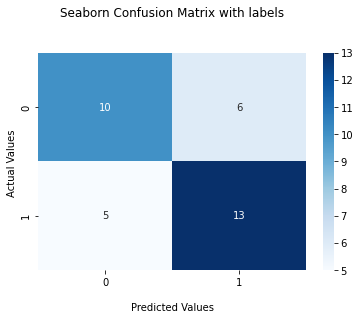

In [ ]:
y_test = predict[13][0]
y_pred = y_array[13]

cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()